# Gerador de diagramas de Venn para diversidade
# Construído com base no exemplo da ferramenta online: https://www.interactivenn.net/index.html

# Instalação das bibliotecas (se necessário, rode em uma célula separada ou no terminal):
# !pip install pandas matplotlib venn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from venn import venn

def gerar_diagramas_venn_por_especialidade(df, especialidade_col, col_valores):
    """
    Gera diagramas de Venn, um para cada especialidade,
    com base nas colunas/valores definidos em col_valores.

    Parâmetros:
    - df (pd.DataFrame): DataFrame contendo os dados de diversidade.
    - especialidade_col (str): Nome da coluna que define as especialidades (ex: 'Especialidade').
    - col_valores (dict): Ex.: {
        'Raça': ('Pessoas Negras', 'Negro'),
        'Gênero': ('Mulher cis', 'F'),
        'PCD': ('PCD', 'Sim'),
        'LGBT': ('LGBTQIA+', 'Sim')
      }
      onde a chave é a coluna, e o valor é uma tupla (nome_para_o_venn, valor_filtrado).

    Retorno:
    - Gera diagramas de Venn, exibidos via plt.show().
    """
    especialidades = df[especialidade_col].unique()
    
    for especialidade in especialidades:
        df_especialidade = df[df[especialidade_col] == especialidade]
        
        # Monta um dicionário para o venn: { rótulo : set(de índices) }
        sets = {}
        for coluna, (rotulo, valor) in col_valores.items():
            subset_ind = df_especialidade[df_especialidade[coluna] == valor].index
            sets[rotulo] = set(subset_ind)
        
        plt.figure(figsize=(10, 8))
        venn(sets)
        plt.title(f'Diagrama de Venn: {especialidade}')
        plt.show()


In [4]:
# Exemplo de dados:
data = {
    'Especialidade': ['Dev', 'Dev', 'Dev', 'QA', 'QA', 'QA'],
    'Raça': ['Negro', 'Branco', 'Negro', 'Branco', 'Negro', 'Negro'],
    'Gênero': ['M', 'M', 'F', 'M', 'F', 'M'],
    'PCD': ['Não', 'Não', 'Sim', 'Não', 'Sim', 'Não'],
    'LGBT': ['Não', 'Não', 'Sim', 'Não', 'Sim', 'Não']
}
df = pd.DataFrame(data)

col_valores = {
    'Raça': ('Pessoas Negras', 'Negro'),
    'Gênero': ('Mulher cis', 'F'),
    'PCD': ('PCD', 'Sim'),
    'LGBT': ('LGBTQIA+', 'Sim')
}

<Figure size 1000x800 with 0 Axes>

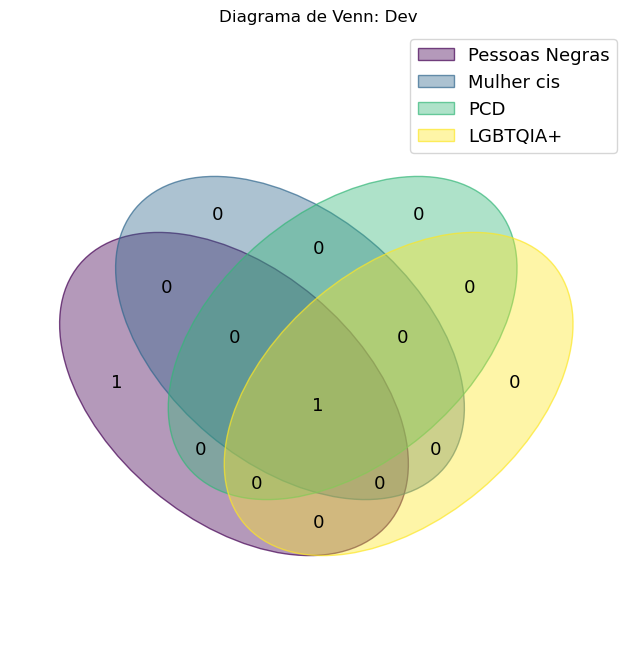

<Figure size 1000x800 with 0 Axes>

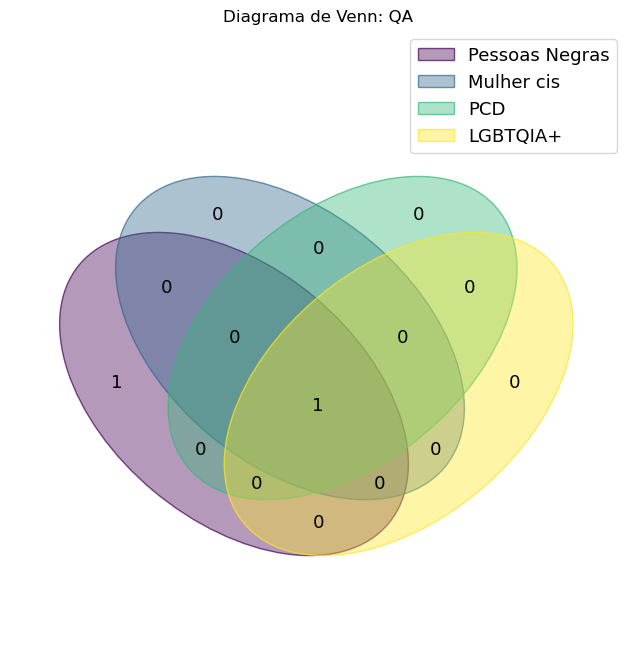

In [5]:
# Chamada de exemplo:
gerar_diagramas_venn_por_especialidade(df, 'Especialidade', col_valores)